In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time

# Catfish Sales Data

In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
#read data
catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)

C:\Users\user\AppData\Local\Temp\ipykernel_17204\365243236.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  catfish_sales = pd.read_csv('catfish.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [4]:
catfish_sales.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


In [5]:
catfish_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 324 entries, 1986-01-01 to 2012-12-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Total   324 non-null    int64
dtypes: int64(1)
memory usage: 5.1 KB


In [6]:
#infer the frequency of the data
#catfish_sales = catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [7]:
#catfish_sales.asfreq(pd.infer_freq(catfish_sales.index))

In [8]:
start_date = datetime(2000,1,1)
end_date = datetime(2004,1,1)
lim_catfish_sales = catfish_sales[start_date:end_date]

In [9]:
lim_catfish_sales.head()

,Total
Date,
2000-01-01,25412
2000-02-01,25354
2000-03-01,29161
2000-04-01,24924
2000-05-01,24763


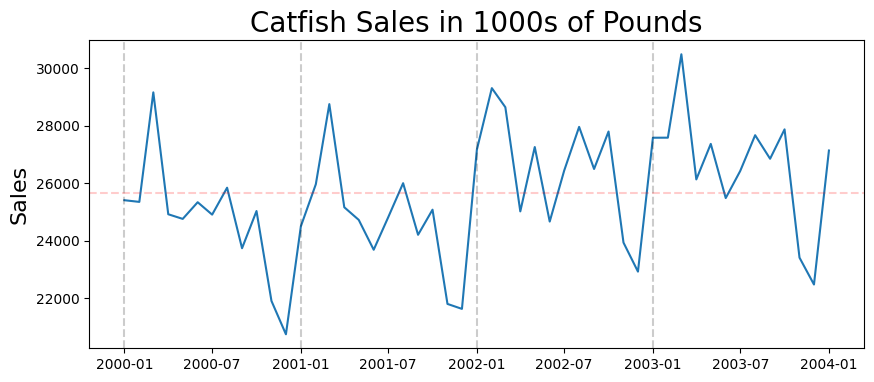

In [10]:
plt.figure(figsize=(10,4))
plt.plot(lim_catfish_sales)
plt.title('Catfish Sales in 1000s of Pounds', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_catfish_sales['Total'].mean(), color='r', alpha=0.2, linestyle='--')

In [11]:
first_diff = lim_catfish_sales.diff()[1:]
print(first_diff)

             Total
Date              
2000-02-01   -58.0
2000-03-01  3807.0
2000-04-01 -4237.0
2000-05-01  -161.0
2000-06-01   579.0
2000-07-01  -431.0
2000-08-01   936.0
2000-09-01 -2104.0
2000-10-01  1293.0
2000-11-01 -3125.0
2000-12-01 -1159.0
2001-01-01  3755.0
2001-02-01  1461.0
2001-03-01  2784.0
2001-04-01 -3585.0
2001-05-01  -439.0
2001-06-01 -1038.0
2001-07-01  1126.0
2001-08-01  1188.0
2001-09-01 -1794.0
2001-10-01   873.0
2001-11-01 -3276.0
2001-12-01  -172.0
2002-01-01  5538.0
2002-02-01  2135.0
2002-03-01  -663.0
2002-04-01 -3622.0
2002-05-01  2238.0
2002-06-01 -2591.0
2002-07-01  1771.0
2002-08-01  1520.0
2002-09-01 -1463.0
2002-10-01  1302.0
2002-11-01 -3861.0
2002-12-01 -1009.0
2003-01-01  4654.0
2003-02-01     2.0
2003-03-01  2899.0
2003-04-01 -4350.0
2003-05-01  1235.0
2003-06-01 -1883.0
2003-07-01   940.0
2003-08-01  1245.0
2003-09-01  -819.0
2003-10-01  1022.0
2003-11-01 -4459.0
2003-12-01  -934.0
2004-01-01  4658.0


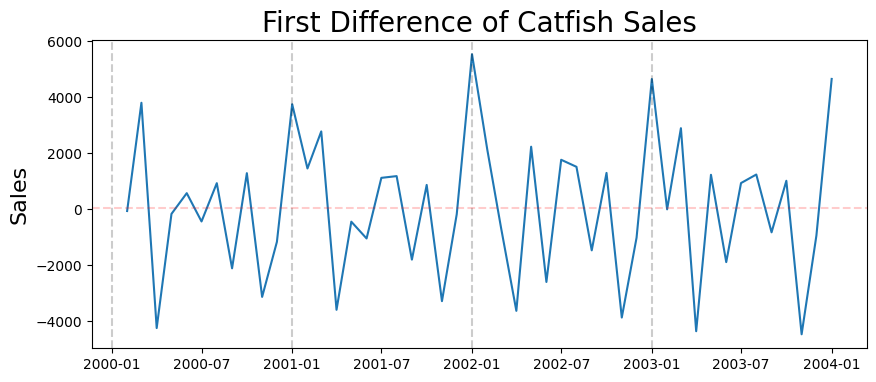

In [12]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff['Total'].mean(), color='r', alpha=0.2, linestyle='--')

# ACF

<BarContainer object of 17 artists>

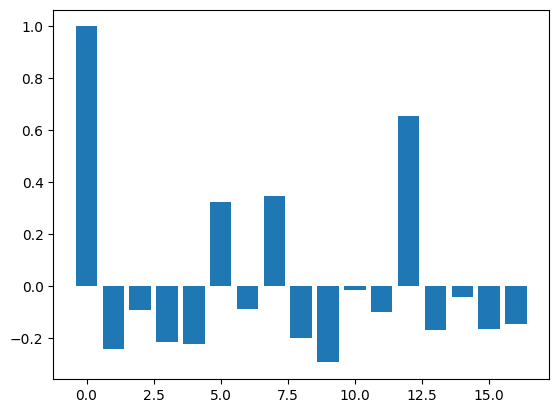

In [13]:
num_lags = 17
acf_vals = acf(first_diff)
plt.bar(range(num_lags), acf_vals[:num_lags])

## Based on ACF, we should start with a MA(1) process

# PACF

<BarContainer object of 17 artists>

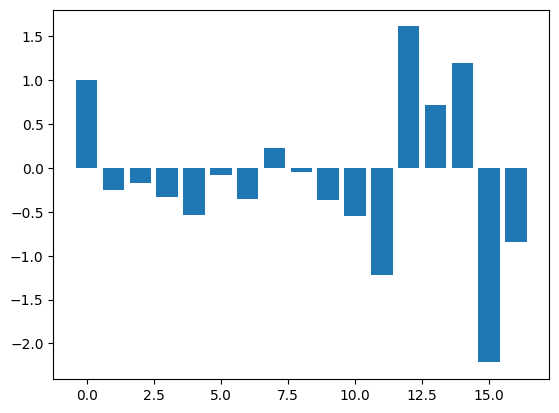

In [14]:
pacf_vals = pacf(first_diff)
plt.bar(range(num_lags), pacf_vals[:num_lags])

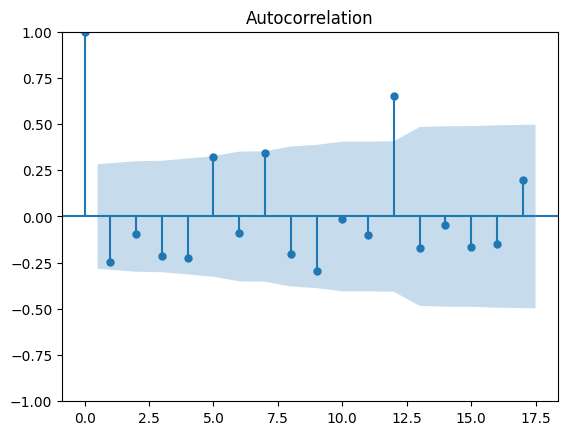

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
# Plot ACF using statsmodels
plot_acf(first_diff, lags=num_lags)
plt.show()

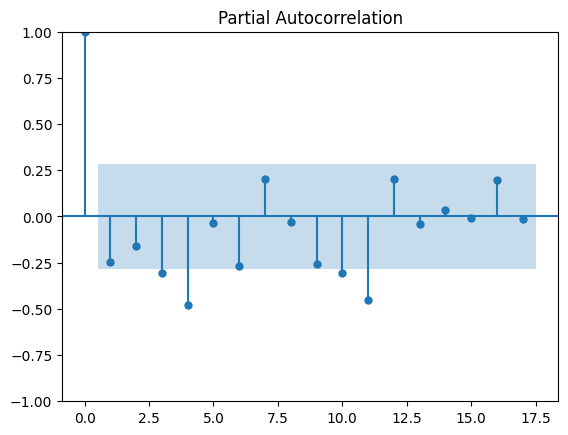

In [16]:
# Plot ACF using statsmodels
plot_pacf(first_diff, lags=num_lags)
plt.show()

## Based on PACF, we should start with a AR(4) process

# Get training and testing sets

In [17]:
train_end = datetime(2003,7,1)
test_end = datetime(2004,1,1)

train_data = first_diff[:train_end]
test_data = first_diff[train_end + timedelta(days=1):test_end]

No. of train data:  39
No. of test data: 10


# Fit the ARMA Model

In [18]:
# define model
model = ARIMA(train_data, order=(4,1,1))

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [19]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.739365816116333


In [20]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Total   No. Observations:                   39
Model:                 ARIMA(4, 1, 1)   Log Likelihood                -344.929
Date:                Sun, 23 Jun 2024   AIC                            701.859
Time:                        14:22:05   BIC                            711.684
Sample:                    01-01-2000   HQIC                           705.354
                         - 03-01-2003                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6697      0.346     -1.936      0.053      -1.348       0.008
ar.L2          0.0134      0.114      0.117      0.907      -0.211       0.237
ar.L3         -0.1979      0.199     -0.994      0.3

In [21]:
model_fit.fittedvalues

Date
2000-01-01        0.000000
2000-02-01    23916.270075
2000-03-01    26478.016950
2000-04-01    24625.080087
2000-05-01    22267.373703
2000-06-01    25549.455450
2000-07-01    24594.020864
2000-08-01    26623.050854
2000-09-01    24678.816872
2000-10-01    24524.027411
2000-11-01    24386.026260
2000-12-01    22685.060543
2001-01-01    20660.454552
2001-02-01    24544.517286
2001-03-01    27005.806126
2001-04-01    27541.047718
2001-05-01    24830.268063
2001-06-01    23950.004502
2001-07-01    24147.898682
2001-08-01    25546.673790
2001-09-01    25827.633757
2001-10-01    24523.969092
2001-11-01    24258.307365
2001-12-01    22558.429550
2002-01-01    21483.491509
2002-02-01    27286.440409
2002-03-01    30125.332300
2002-04-01    27179.918099
2002-05-01    24159.795412
2002-06-01    27108.781109
2002-07-01    25871.658590
2002-08-01    26140.259425
2002-09-01    27944.167393
2002-10-01    27007.768067
2002-11-01    26585.325214
2002-12-01    24811.625317
2003-01-01    22576.698

In [22]:
test_data.index[0]

Timestamp('2003-04-01 00:00:00')

In [23]:
model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

2003-04-01    28939.848796
2003-05-01    28701.997644
2003-06-01    28266.415553
2003-07-01    28043.971984
2003-08-01    28669.448348
2003-09-01    28400.781794
2003-10-01    28755.809550
2003-11-01    28453.359323
2003-12-01    28537.619836
2004-01-01    28482.578421
Freq: MS, Name: predicted_mean, dtype: float64

## So the ARMA(4,1) model is:

## $\hat{y_t} = -0.87y_{t-1} - 0.42y_{t-2} - 0.56y_{t-3} - 0.61y_{t-4} + 0.52\varepsilon_{t-1}$

In [24]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [25]:
test_data.index[0]

Timestamp('2003-04-01 00:00:00')

In [26]:
test_data

Date
2003-04-01    26135
2003-05-01    27370
2003-06-01    25487
2003-07-01    26427
2003-08-01    27672
2003-09-01    26853
2003-10-01    27875
2003-11-01    23416
2003-12-01    22482
2004-01-01    27140
Name: Total, dtype: int64

In [27]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['Total'] - predictions

KeyError: 'Total'

In [ ]:
predictions

In [ ]:
predictions_1 = model_fit.forecast(steps=len(test_data))
print(predictions_1)

In [ ]:
residuals

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

In [ ]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [ ]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))